# Chapter 7: Deep Learning

$$ % Latex macros
\newcommand{\mat}[1]{\begin{pmatrix} #1 \end{pmatrix}}
\newcommand{\p}[2]{\frac{\partial #1}{\partial #2}}
\renewcommand{\b}[1]{\boldsymbol{#1}}
\newcommand{\w}{\boldsymbol{w}}
\newcommand{\x}{\boldsymbol{x}}
\newcommand{\y}{\boldsymbol{y}}
\newcommand{\z}{\boldsymbol{z}}
$$

## Contents

* 7.1 Multi-Layer Neural Networks (Bishop, Chater 5)
    * Universality of two-layer networks
    * Recurrent neural networks


* 7.2 Back-Propagation Learning
    * Function approximation
    * Classification


* 7.3 Deep Generative Models
    
* 7.4 Restricted Boltzmann Machines (RBM)

* 7.5 Variational Auto-Encoders (VAE)


* 7.6 Deep Learning Tools
    * Appendix: Deep learning by PyTorch


* 7.6 Visual Cortex and Convolutional Networks
    * Visual cortex
    * Neocognitron
    * Deep neural networks for neuroscience

## 7.1 Multi-Layer Neural Networks

In the classic perceptrons and standard linear regression models, the input features $\b{\phi}(\x)$ were fixed and only the output connection weights $\w$ were changed by learning to compute the output

$$
    y = \w^T \b{\phi}(\x).
$$

The capability of such networks is dependent on what features we prepare, either by many randomly connected units in perceptrons or hand-crafted features in conventional patter classification.

An alternative approach is to learn features that suite the required input-output mapping. 
Let us consider a two-layer network

$$
y = w^o_{0} + \sum_{i=1}^M w^o_{i} h_i
$$

$$
    h_i = g(w^h_{i0} + \sum_{j=1}^D w^h_{ij} x_j),
$$

where $(h_1,...,h_M)$ are the outputs of *hidden units*.

The *activation function* $g(\ )$ is usually the logistic sigmoid function

$$
    g(u)=\frac{1}{1+e^{-u}}
$$

or the rectified linear unit (ReLU)

$$
    g(u)=\max(u, 0).
$$

Learning of the hidden unit weights $w^h_{ij}$ is possible by error gradient descent when the nonlinear function $g(\ )$ is differentiable.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def draw_net(M=[3,4,2], label="", color=None, offs=0):
    """Draw a multi-layer network with M units"""
    L = len(M)    # number of layers
    Y = [ np.linspace(0,1,M[l]+2)[1:-1] for l in range(L)]  # cell positions
    for l in range(L):  # from bottom to top layers
        if l<L-1:  # cross lines
            y = np.row_stack((np.tile(Y[l],M[l+1]), np.repeat(Y[l+1],M[l])))
            plt.plot([l, l+1], y, c=color)  # connections
        plt.plot(l, Y[l].reshape((1,-1)), 'ow', ms=20, mec='k')  # cells
        if type(label) is list:  # each string
            plt.text(l, Y[l][0]/2, label[l], fontsize=16, ha='center')
        else:    # format with l
            plt.text(l, Y[l][0]/2, label.format(l), fontsize=16, ha='center')
    plt.axis('off');
    return Y  # cell positions

/var/folders/dd/3kwwsm055d1cc1w134st1f580000gn/T/ipykernel_74841/345111544.py:7: DeprecationWarning: `row_stack` alias is deprecated. Use `np.vstack` directly.
  y = np.row_stack((np.tile(Y[l],M[l+1]), np.repeat(Y[l+1],M[l])))


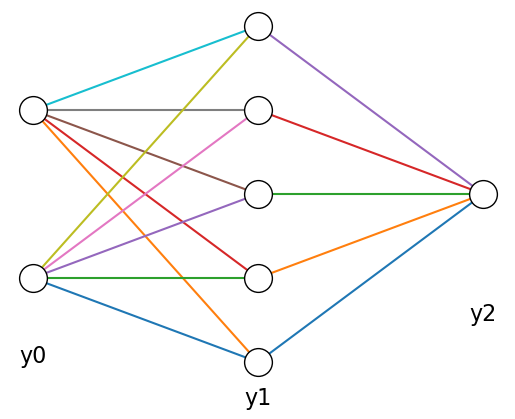

In [3]:
draw_net([2,5,1], "y{}");

### Universality of multi-layer neural networks

It has been shown that the two-layer network can approximate any nonlinear function to any desired accuracy using sufficiently large number of hidden units, called *universality* of multi-layer neural networks.

While just two layers are theoretically enough, it has been shown in applications of multi-layer neural networks that three or more deeper neural networks are more capable in learning complex function approximation or classification tasks.

### Recurrent neural networks

A discrete-time recurrent neural networks can be considered, by spatial unrolling, as a deep neural network with the same weights shared across all layers. 

Thus back-propagation algorithm below can be used for supervised learning of recurrent neural networks.
It is known as *back-propatation through time*.

As a corollary to the universality of two-layer neural networks, recurrent neural networks can approximate arbitrary dynamical systems.


## 7.2 Back-Propagation Learning

Here we consider a general $L$-layer network

$$
    y^l_i = g^l(w^l_{i0} + \sum_{j=1}^{M^l} w^l_{ij} y^{l-1}_j)
$$
for $l=(1,...,L)$.  
$\y^0=\x$ is the input vector and $\y=\y^L$ is the output vector.

For function approximation, the output function of the last layer is usually linear, i.e. $g^L(u)=u$. 

Here we consider a *stochastic gradient* learning, in which we change the weight parameters toward the descending gradient of the error for each input data:

The basic way of online learning is to minimize the output error for each input 

$$
E = \frac{1}{2}||\y - \y^*||^2 = \frac{1}{2}\sum_{i=1}^{M^L}(y^L_i - y^*_i)^2.
$$

The error gradient for the output unit weights are computes as in the linear regression

$$
\p{E}{w^L_{ij}} = \p{E}{y^L_i}\p{y^L_i}{w^L_{ij}}
  = (y^L_i - y^*_i)y^{L-1}_j. 
$$

By further applying the chain rule of derivatives, the gradient for the hidden unit weights can be computed by following the network top to bottom:

$$
\p{E}{w^l_{ij}} = \p{E}{y^l_i}\p{y^l_i}{w^l_{ij}}
  = \p{E}{y^l_i} g'^l_i y^{l-1}_j, 
$$
where $g'^l_i$ is the derivative of the output function. For the logistic sigmoid, it is given as

$$
g'^l_i = y^l_i(1-y^l_i). 
$$

In the above, $\p{E}{y^l_i}$ takes the role of an effective error for the $i$-th unit in layer $l$, and computed iteratively

$$
\p{E}{y^l_i} = \sum_{k=1}^{M^{l+1}}\p{E}{y^{l+1}_k}g'^{l+1}_k w^{l+1}_{ki}. 
$$

In the example below, the red lines show the propagation of errors from the two output units to a unit in layer 2.  
The blue lines show the propagation of errors through layer 2 to one unit in layer 1.

/var/folders/dd/3kwwsm055d1cc1w134st1f580000gn/T/ipykernel_74841/345111544.py:7: DeprecationWarning: `row_stack` alias is deprecated. Use `np.vstack` directly.
  y = np.row_stack((np.tile(Y[l],M[l+1]), np.repeat(Y[l+1],M[l])))
/var/folders/dd/3kwwsm055d1cc1w134st1f580000gn/T/ipykernel_74841/3693421515.py:3: DeprecationWarning: `row_stack` alias is deprecated. Use `np.vstack` directly.
  plt.plot([3,2], np.row_stack((Y[3],np.repeat(Y[2][1],2)))+0.01, "r")
/var/folders/dd/3kwwsm055d1cc1w134st1f580000gn/T/ipykernel_74841/3693421515.py:5: DeprecationWarning: `row_stack` alias is deprecated. Use `np.vstack` directly.
  plt.plot([3,2], np.row_stack((np.repeat(Y[3],3),np.tile(Y[2],2))), "b")
/var/folders/dd/3kwwsm055d1cc1w134st1f580000gn/T/ipykernel_74841/3693421515.py:6: DeprecationWarning: `row_stack` alias is deprecated. Use `np.vstack` directly.
  plt.plot([2,1], np.row_stack((Y[2],np.repeat(Y[1][1],3))), "b");


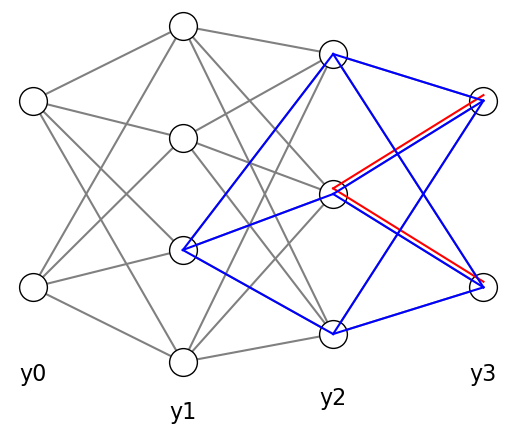

In [4]:
Y = draw_net([2, 4, 3, 2], label="y{}", color="gray")
# to layer 2
plt.plot([3,2], np.row_stack((Y[3],np.repeat(Y[2][1],2)))+0.01, "r")
# to layer 1
plt.plot([3,2], np.row_stack((np.repeat(Y[3],3),np.tile(Y[2],2))), "b")
plt.plot([2,1], np.row_stack((Y[2],np.repeat(Y[1][1],3))), "b");

Using these error gradients, all the weights can be updated by

$$
    \Delta w^l_{ij} = - \alpha \p{E}{w^l_{ij}} 
$$
where $\alpha>0$ is a learning rate paramter.

This is called *error back-propagation* learning algorithm.

Below is a sample implementation of back-propagation with sigmoid hidden units and linear output units.

In [5]:
class DNN:
    """Simple class for a deep neural network"""

    def __init__(self, units=[2,2,1], winit=0.1):
        """Create a new netowrk: units:list of numbers of units"""
        self.L = len(units)-1   # number of layers (excluding input)
        self.M = units  # numbers of units in layers
        # output and error vectors: layer 0 to L
        self.Y = [np.zeros(self.M[l]) for l in range(self.L+1)]
        self.err = [np.zeros(self.M[l]) for l in range(self.L+1)]
        # initialize small random weights and bias
        self.W = [np.random.normal(scale=winit, size=(self.M[l+1],self.M[l]+1)) for l in range(self.L)]
    
    def act(self, u):
        """activation function y=g(u)"""
        return 1/(1+np.exp(-u))  # logistic sigmoid
    def dact(self, y):
        """derivative of activation function dy/du|y"""
        return y*(1-y)     # dy/du

    def output(self, u):
        """activation function for the output unit"""
        return u  # identity
    def outerror(self, y, yt):
        """output error based on negative log likelihood"""
        return y-yt  # difference
    
    def forward(self, input):
        """Compute the output"""
        self.Y[0] = np.array(input).reshape((-1)) # input vector
        for l in range(self.L):
            z = self.W[l][:,0] + self.W[l][:,1:]@self.Y[l]  # include bias
            self.Y[l+1] = (self.output(z) if l+1==self.L else self.act(z))  # linear output
        return self.Y[-1].squeeze()  # last layer, as scalar if 1D
    
    def backprop(self, target, alpha=0.01):
        """Error backpropagation learning"""
        for l in range(self.L, 0, -1):  # from top to bottom
            if l==self.L:  # output layer
                self.err[l] = self.outerror(self.Y[l], target)  # output error
            else:
                # error propapation from the layer above
                self.err[l] = self.err[l+1]@self.W[l][:,1:] # exclude bias
                self.err[l] *= self.dact(self.Y[l])  # error before the gain
            # error gradient
            dW = np.outer(self.err[l], np.concatenate(([1], self.Y[l-1])))
            # update weights by the error gradient
            self.W[l-1] -= alpha*dW
        return np.dot(self.err[-l],self.err[-l])  # sum of squared error
    
    def train(self, inputs, targets, alpha=0.01, repeat=1):
        """train by a dataset"""
        N = inputs.shape[0]  # data size
        if repeat>1:
            mse = np.zeros(repeat)  # record of mean square errors
            for t in range(repeat):
                sse = self.train(inputs, targets, alpha, repeat=1)
                mse[t] = np.mean(sse)
            return mse
        else:
            sse = np.zeros(N)  # record of sum square errors
            for n in np.random.permutation(N):
                y = self.forward(inputs[n])
                sse[n] = self.backprop(targets[n], alpha)
            return sse

### Example: Sine wave

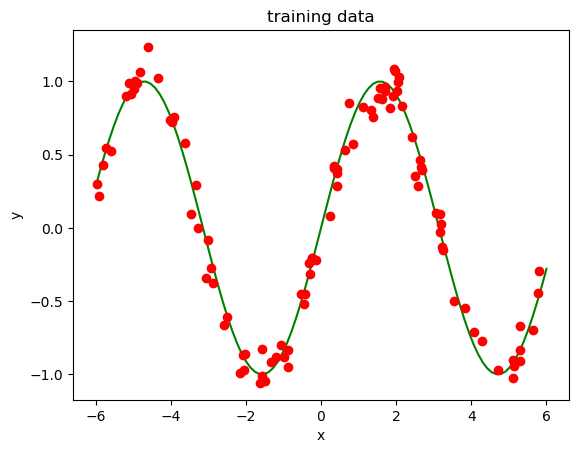

In [6]:
# sine wave dataset
N = 100
sigma = 0.1  # noise
xr = 6  # range of x
X = np.random.uniform(-xr, xr, N) #.reshape((N,1))
t = np.sin(X) + np.random.normal(scale=sigma, size=N) #(N,1))
Np = 100  # data for test/plot
Xp = np.linspace(-xr, xr, Np) #.reshape((N,1))
fp = np.sin(Xp)
plt.plot(Xp, fp, "g")  # target
plt.plot(X, t, "ro")   # training data
plt.xlabel("x"); plt.ylabel("y"); plt.title("training data");

In [7]:
# Create a network
M = 10
dn = DNN([1, M, 1], winit=0.1)

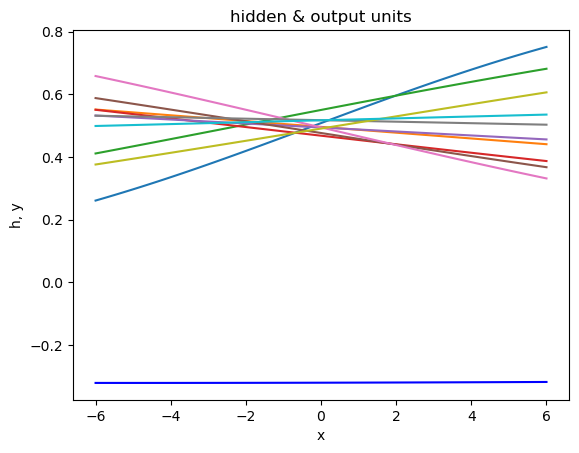

In [8]:
# Visualize hidden and output units
yp = np.zeros(Np)
hp = np.zeros((Np, dn.M[1]))
for n in range(Np):
    yp[n] = dn.forward(Xp[n])
    hp[n] = dn.Y[1]  # hidden units
plt.plot(Xp, yp, "b")  # output unit
plt.plot(Xp, hp)  # hidden units
plt.xlabel("x"); plt.ylabel("h, y"); plt.title("hidden & output units");

mse = 0.5015420336559415


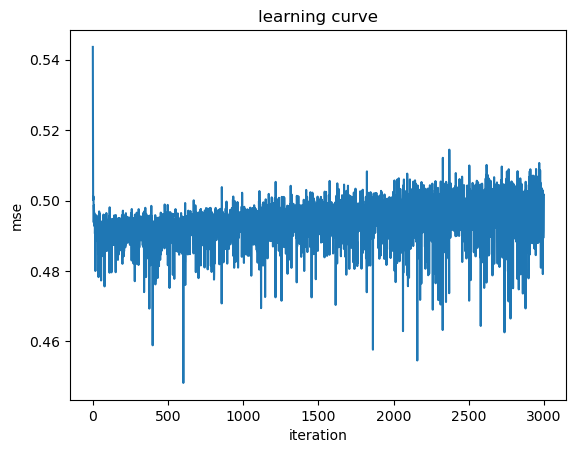

In [9]:
# Train with the data
mse = dn.train(X, t, alpha=0.01, repeat=3000)
#print(dn.W)
print("mse =", mse[-1])  # final mse
plt.plot(mse); 
plt.xlabel("iteration"); plt.ylabel("mse"); plt.title("learning curve");

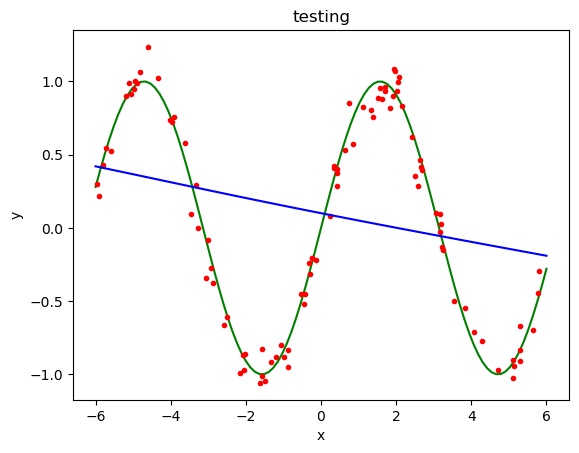

In [10]:
# see fitting
yp = [dn.forward(Xp[n]) for n in range(Np)]
plt.plot(Xp, fp, "g")  # target
plt.plot(X, t, "r.")   # training data
plt.plot(Xp, yp, "b")  # testing
plt.xlabel("x"); plt.ylabel("y"); plt.title("testing");

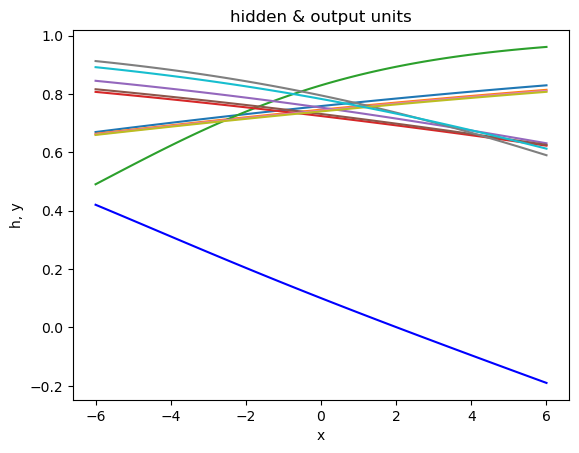

In [11]:
# Visualize hidden and output units
for n in range(Np):
    yp[n] = dn.forward(Xp[n])
    hp[n] = dn.Y[1]  # hidden units
plt.plot(Xp, yp, "b")  # output unit
plt.plot(Xp, hp)  # hidden units
plt.xlabel("x"); plt.ylabel("h, y"); plt.title("hidden & output units");

### Deep NN for classification

For binary classification, the target output is $y^*\in\{0,1\}$ and we use a network with sigmoid output to predict the probablity 

$$
p(y^*=1)=y=\sigma(u)=\frac{1}{1+e^{-u}}.
$$

The output error calculated as negative log likelihood

$$
E = -y^*\log y -(1-y^*)\log(1-y) 
$$
is called *cross entropy error*.

Its gradient with respect to the output $y$ is

$$
\p{E}{y} = -\frac{y^*}{y} + \frac{1-y^*}{1-y}. 
$$

The gradient with respect to the input sum $z$ is

$$
\p{E}{z} = \p{E}{y}\p{y}{z}
   = (-\frac{y^*}{y} + \frac{1-y^*}{1-y}) y(1-y) 
$$

$$
= -y^*(1-y) + (1-y^*)y = y - y^*. 
$$

Below is a modified class for binary classification.

In [12]:
class DNNb(DNN):
    """A deep neural network for classification"""
    # override the output function and error
    def output(self, u):
        """activation function for the output unit"""
        return self.act(u)  # sigmoid
    # the output error dE/dz stays the same

#### Example: Exclusive OR

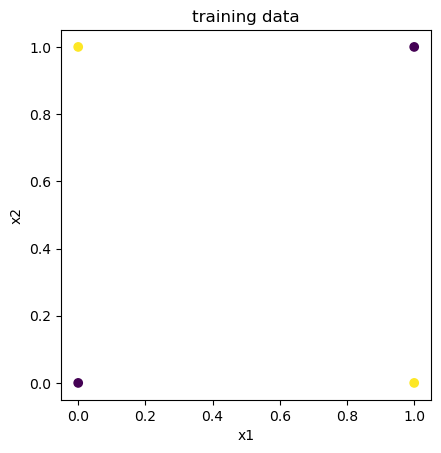

In [13]:
# ExOr data
N = 4
#sigma = 0.1  # input spread
X = np.array([[0,0], [0,1], [1,0], [1,1]])  # four corners
yt = np.array([0, 1, 1, 0])  # ExOr
plt.scatter(X[:,0], X[:,1], c=yt)
plt.xlabel("x1"); plt.ylabel("x2"); plt.axis('square'); plt.title("training data");

In [14]:
# Create a network
M = 5  # hidden units
dn = DNNb([2, M, 1], winit=0.1)

In [15]:
# data for test/plot
Np = 10  
xp = np.linspace(0, 1, Np)

/var/folders/dd/3kwwsm055d1cc1w134st1f580000gn/T/ipykernel_74841/2164905428.py:11: DeprecationWarning: `row_stack` alias is deprecated. Use `np.vstack` directly.
  plt.plot([0,1], np.row_stack((h0,h1)));


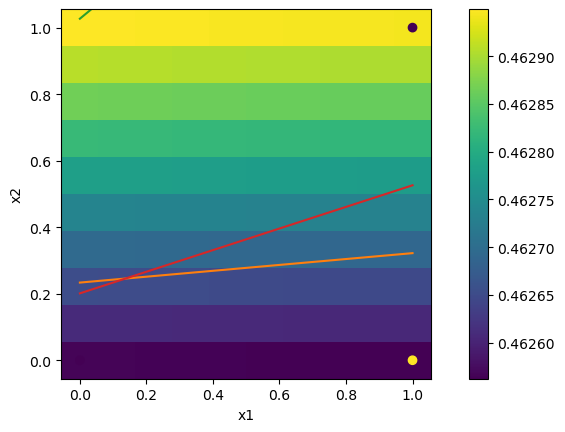

In [16]:
# Output
yp = np.array([[dn.forward(np.array([xp1,xp2])) for xp2 in xp] for xp1 in xp])
plt.pcolormesh(xp, xp, yp.squeeze())
plt.colorbar()
plt.xlabel("x1"); plt.ylabel("x2"); plt.axis('square');
# Hidden unit activation boundaries
# w0+w1*x1+w2*x2=0 -> x2=-(w0+w1*x1)/w2
h0 = -dn.W[0][:,0]/dn.W[0][:,2]
h1 = -(dn.W[0][:,0]+dn.W[0][:,1])/dn.W[0][:,2]
plt.scatter(X[:,0], X[:,1], c=yt)
plt.plot([0,1], np.row_stack((h0,h1)));

mse = 0.0009709690743249452


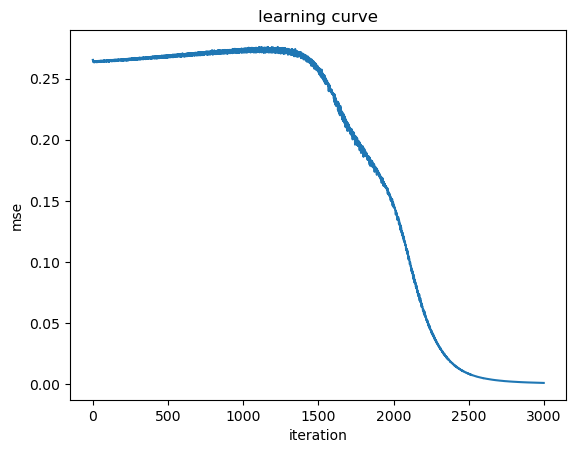

In [17]:
# Train with the data
mse = dn.train(X, yt, alpha=0.1, repeat=3000)
#print(dn.W)
print("mse =", mse[-1])  # final mse
plt.plot(mse); 
plt.xlabel("iteration"); plt.ylabel("mse"); plt.title("learning curve");

/var/folders/dd/3kwwsm055d1cc1w134st1f580000gn/T/ipykernel_74841/2164905428.py:11: DeprecationWarning: `row_stack` alias is deprecated. Use `np.vstack` directly.
  plt.plot([0,1], np.row_stack((h0,h1)));


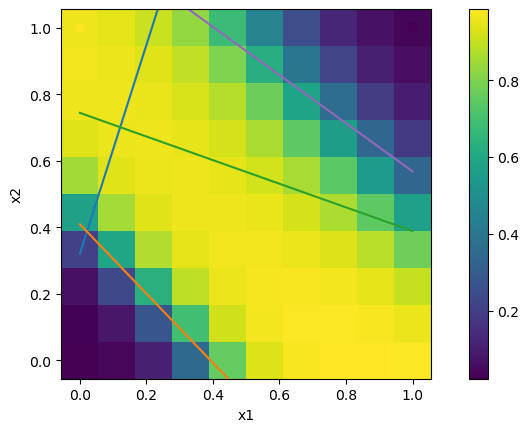

In [18]:
# Output
yp = np.array([[dn.forward(np.array([xp1,xp2])) for xp2 in xp] for xp1 in xp])
plt.pcolormesh(xp, xp, yp.squeeze())
plt.colorbar()
plt.xlabel("x1"); plt.ylabel("x2"); plt.axis('square');
# Hidden unit activation boundaries
# w0+w1*x1+w2*x2=0 -> x2=-(w0+w1*x1)/w2
h0 = -dn.W[0][:,0]/dn.W[0][:,2]
h1 = -(dn.W[0][:,0]+dn.W[0][:,1])/dn.W[0][:,2]
plt.scatter(X[:,0], X[:,1], c=yt)
plt.plot([0,1], np.row_stack((h0,h1)));

#### Example: Donut

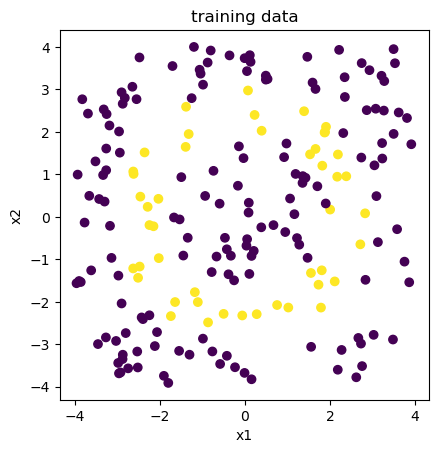

In [19]:
N = 200
xr = 4
X = np.random.uniform(-xr, xr, (N,2))
y = (X[:,0]**2+X[:,1]**2)
yt = (y>4) * (y<9)
plt.scatter(X[:,0], X[:,1], c=yt)
plt.xlabel("x1"); plt.ylabel("x2"); plt.axis('square'); plt.title("training data");

In [20]:
# Create a network
M = 10  # hidden units
dn = DNNb([2, M, 1], winit=0.1)

In [21]:
# data for test/plot
Np = 20  
xp = np.linspace(-xr, xr, Np)

/var/folders/dd/3kwwsm055d1cc1w134st1f580000gn/T/ipykernel_74841/3001121381.py:10: DeprecationWarning: `row_stack` alias is deprecated. Use `np.vstack` directly.
  plt.plot([-xr,xr], np.row_stack((h0,h1)))


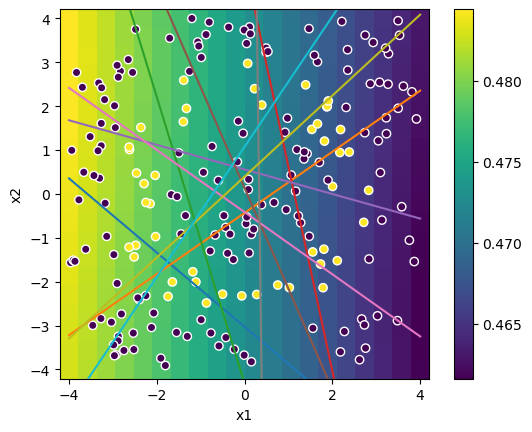

In [22]:
# Output
yp = np.array([[dn.forward(np.array([xp1,xp2])) for xp2 in xp] for xp1 in xp])
plt.pcolormesh(xp, xp, yp.squeeze())
plt.xlabel("x1"); plt.ylabel("x2"); plt.axis('square');
plt.colorbar()
# Hidden unit activation boundary
# w0+w1*x1+w2*x2=0 -> x2=-(w0+w1*x1)/w2
h0 = -(dn.W[0][:,0]-xr*dn.W[0][:,1])/dn.W[0][:,2]
h1 = -(dn.W[0][:,0]+xr*dn.W[0][:,1])/dn.W[0][:,2]
plt.plot([-xr,xr], np.row_stack((h0,h1)))
# training data
plt.scatter(X[:,0], X[:,1], c=yt, edgecolors='w');

mse = 0.04440478853954548


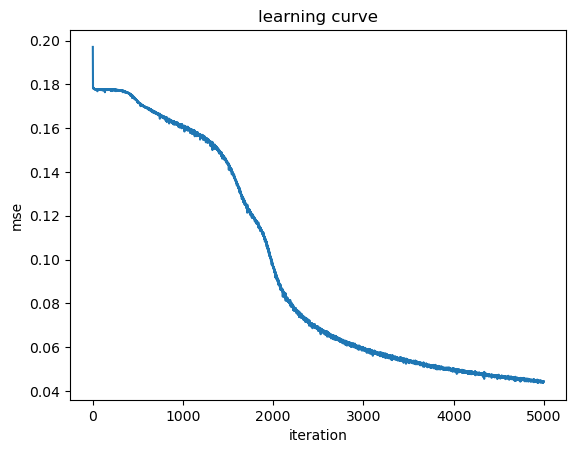

In [23]:
# Train with the data
mse = dn.train(X, yt, alpha=0.01, repeat=5000)
#print(dn.W)
print("mse =", mse[-1])  # final mse
plt.plot(mse); 
plt.xlabel("iteration"); plt.ylabel("mse"); plt.title("learning curve");

/var/folders/dd/3kwwsm055d1cc1w134st1f580000gn/T/ipykernel_74841/3001121381.py:10: DeprecationWarning: `row_stack` alias is deprecated. Use `np.vstack` directly.
  plt.plot([-xr,xr], np.row_stack((h0,h1)))


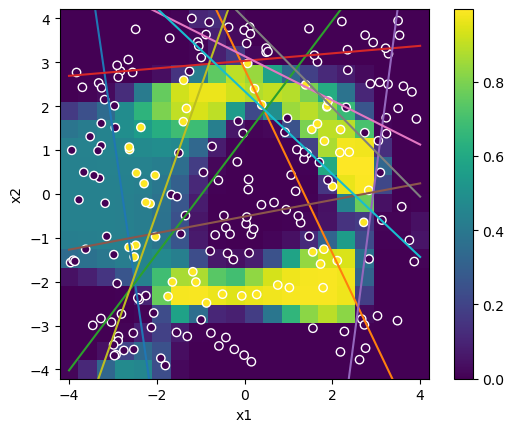

In [24]:
# Output
yp = np.array([[dn.forward(np.array([xp1,xp2])) for xp2 in xp] for xp1 in xp])
plt.pcolormesh(xp, xp, yp.squeeze())
plt.xlabel("x1"); plt.ylabel("x2"); plt.axis('square');
plt.colorbar()
# Hidden unit activation boundary
# w0+w1*x1+w2*x2=0 -> x2=-(w0+w1*x1)/w2
h0 = -(dn.W[0][:,0]-xr*dn.W[0][:,1])/dn.W[0][:,2]
h1 = -(dn.W[0][:,0]+xr*dn.W[0][:,1])/dn.W[0][:,2]
plt.plot([-xr,xr], np.row_stack((h0,h1)))
# training data
plt.scatter(X[:,0], X[:,1], c=yt, edgecolors='w');

### Multi-class classification

For multiple classes $K$, the target output is $\y^*=(y^*_1,...,y^*_K)$ where only one of the component $y^*_k=1$ and others are zero.

In this case the standard activation function is the *softmax* function

$$ y_k = p(y^*_k=1) = \mbox{softmax}_k(\b{u}) = \frac{e^{u_k}}{\sum_{j=1}^K e^{u_j}} $$
and the cross entropy error is given as

$$ E = - \sum_{k=1}^K y^*_k \log y_k $$

Its gradient with respect to the output $y_k$ is

$$ \p{E}{y_k} = -\frac{y^*_k}{y_k} $$

The derivative of the softmax function is

$$ \p{y_k}{u_i} = \delta_{ki}\frac{e^{u_k}}{\sum_{j=1}^K e^{u_j}}
- \frac{e^{u_k}e^{u_i}}{(\sum_{j=1}^K e^{u_j})^2} 
 = \delta_{ki}y_k + y_k y_i $$

Thus the error gradient with respect to the input sum $u_i$ is

$$ \p{E}{u_i} = \sum_{k=1}^K \p{E}{y_k}\p{y_k}{u_i}
   = \sum_{k=1}^K -\frac{y^*_k}{y_k}(\delta_{ki}y_k - y_k y_i) $$

$$ = \sum_{k=1}^K -y^*_k(\delta_{ki} + y_i) 
   = y_i - y^*_i, $$
same as in the case of linear output and sigmoid output.

## 7.3 Deep Generative Models

In back-propagation, we considered input-output mapping

$$
    \y = f(\x)
$$
to approximate the target output $\y^*$.

An opposite approach is *generative models*

$$
    \x \sim g(\x|\z)
$$
which assumes that the data $\x$ are produced by a hierarchical probabilistic model with the higher level *latent variable* $\z$, such as the class labels or low-dimensional parameter space.
For a given input $\x$, we consider what is the latent variable behind the data, such as the MAP estimate

$$
    \y = \arg\max_\z g(\x|\z)
$$

### Boltzmann machine

The Boltzmann machine is a stochastic binary recurrent network consisting of *visible* and *hidden* units. The joint distribution over the visible and hidden units is given by the *energy function*. 

With sufficient number of hidden units and setting of the connection weights, Boltzmann machines can represent arbitrary distributions over visible units. However, learning of Boltzmann machine is *intractable*, requiring computation of posterior probabilities for exponentially large number of states.

The *restricted Bolzmann machine (RBM)* is a Boltzmann machine having a layered structure, with connections only between subsequent layers and no connections within each layer.
As described below, RBM can be trained efficiently by an algorithm called *contrastive divergence*.

### Deep generative networks

Early deep generative models were produced by stacking RBMs and train them from the bottom to top. Examples are *deep belief networks (DBN)* and *deep Boltzmann machine (DBM)*.
They were used for pre-training of deep networks for pattern classification, although recently simple back-propagation without pre-training has become popular (Salakhutdinov & Hinton 2012).

Currently *variational auto encoders (VAE)* and *generative adversarial networks (GAN)* are the most popular and successful architectures in image generation.

VAE is composed of two networks, a differentiable *generator* network that converts hidden variable $\b{z}$ to data $\x$, and an *encoder* network that learns to approximate the posterior probability of the hidden variables $p(\b{z}|\x)$.

GAN also uses a differentiable generator network but is coupled with a *discriminator* network that learns to distinguish the real data and the data produced by the generator.

## 7.4 Restricted Boltzmann Machines

A restricted Boltzmann machine (RBM) is a two-layer network with undirected connections between visible and hidden layers, with no connections among visible or hidden layers. This produces conditional independence of distributions of hidden units given visible units, and visible units given hidden units, which allows efficient learning (Hinton 2010).

/var/folders/dd/3kwwsm055d1cc1w134st1f580000gn/T/ipykernel_74841/345111544.py:7: DeprecationWarning: `row_stack` alias is deprecated. Use `np.vstack` directly.
  y = np.row_stack((np.tile(Y[l],M[l+1]), np.repeat(Y[l+1],M[l])))


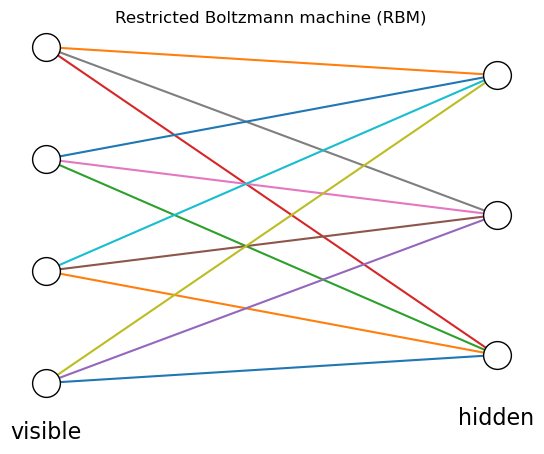

In [25]:
draw_net([4,3], label=["visible", "hidden"])
plt.title("Restricted Boltzmann machine (RBM)");

Here we represent the state of visible units by $\b{v}\in\{0,1\}^{M_v}$ and hidden units by $\b{h}\in\{0,1\}^{M_h}$. 
For the connection weights $W\in R^{M_v\times M_h}$ and the bias inputs $\b{b}$ and $\b{c}$ for visible and hidden units, respectively, 
the *energy* function of the RBM is defined as

$$ E(\b{v},\b{h}) = −\b{b}^T\b{v} − \b{c}^T\b{h} − \b{v}^T W\b{h}. $$

The joint distribution of the states of the visible and and hidden units are given by

$$ p(\b{v},\b{h}) = \frac{1}{Z} e^{−E(\b{v},\b{h})}, $$
where $Z$ is the normalizing constant called *partition function*, given by

$$ Z = \sum_\b{v}\sum_\b{h} e^{−E(\b{v},\b{h})}. $$

The marginal distribution for the visibile units is given by summing over all states of hidden units

$$ p(\b{v}) = \frac{1}{Z}\sum_\b{h} e^{−E(\b{v},\b{h})}. $$

As the analytic form of maximul likelihood estimate is not available, we apply the stochastic gradient with respect to the parameters $\theta=(W,\b{b},\b{c})$ . 
The gradient of the log probability of the energy-based model is given by

$$ \p{\log p(\b{v},\b{h}|\theta)}{\theta} 
 = -\p{E(\b{v},\b{h};\theta)}{\theta} 
 + \sum_{\b{v}}\sum_{\b{h}}p(\b{v},\b{h})\p{E(\b{v},\b{h};\theta)}{\theta}. $$

Thus the log likelihood for the visible unit state $\b{v}_n$ $(n=1,...,N)$ is given as

$$ \p{\log p(\b{v}_n|\theta)}{\theta} 
 = -\sum_\b{h}p(\b{h}|\b{v}_n)\p{E(\b{v}_n,\b{h};\theta)}{\theta} 
 + \sum_{\b{v}}\sum_{\b{h}}p(\b{v},\b{h})\p{E(\b{v},\b{h};\theta)}{\theta} $$
The first term is data-dependent statistics and the second term is data-independent statistics coming from the partition function.

### Learning by contrastive divergence (CD)

Because RBM has no connections between hidden units, the probability of the hidden unit states is conditionally independent given the visible unit state

$$ p(\b{h}|\b{v}) = \prod_{j=1}^{M_h} p(h_j|\b{v}). $$
The probability for each hidden unit to be active is given by the sigmoid function of its input

$$ p(h_j=1|\b{v}) = \sigma(c_j + \sum_{i=1}^{M_v}v_i w_{ij}).$$
This allows evaluation of the first term of the log likelihood gradient by simple sampling.

Similarly, the probability for the visible units is also conditionally independent given the hidden units and each visible unit satate is given by

$$ p(v_i=1|\b{h}) = \sigma(b_i + \sum_{j=1}^{N_h}w_{ij}h_j). $$

In order to evaluate the second term, we have to take samples from the unconstrained model dynamics. The *contrastive divergence* method takes a crude approximation of the model distribution but has been shown to perform surprizingly well.

First we set the initial state of the visible units by a sample $\b{v}^0=\b{v}_n$. Then we repeatedly sample hidden units

$$ \b{h}^k \sim p(\b{h}|\b{v}^k) $$
and the visible units

$$ \b{v}^{k+1} \sim p(\b{v}|\b{h}^k) $$
for $K$ times. 

The unconstrained joint distribution is approximated by

$$ p_{CD_K}(\b{v},\b{h})=\delta(\b{v}-\b{v}_n^K)p(\b{h}|\b{v}_n^K), $$

where $\delta(\x)$ is a single point distribution at $\x=0$.

The parameters are updated with a learning rate parameter $\alpha$ as follows.

$$ \Delta W = \alpha [\b{v}_n p(\b{h}|\b{v}_n) - \b{v}_n^K p(\b{h}|\b{v}_n^K)]  $$

$$ \Delta\b{b} = \alpha [\b{v}_n - \b{v}_n^K]  $$

$$ \Delta\b{c} = \alpha [p(\b{h}|\b{v}_n) - p(\b{h}|\b{v}_n^K)]. $$

This contrastive divergence method has been shown to work well even for small $K=1$.
Instead of this stochastic gradient for each data, *mini-batch* method to average gradients for tens of data points are often used.

In [26]:
# RBM
class RBM:
    """Restricted Boltzmann machine [Mv,Mh]"""

    def __init__(self, units=[4,3], winit=0.1):
        """Create a new RBM: units:list of numbers of units"""
        self.Mv, self.Mh = units  # number of visible/hidden units
        # visible and hidden units
        self.v = np.zeros(self.Mv)
        self.h = np.zeros(self.Mh)
        # initialize small random weights and bias
        self.W = np.random.normal(scale=winit, size=(self.Mv,self.Mh))
        self.b = np.random.normal(scale=winit, size=self.Mv)
        self.c = np.random.normal(scale=winit, size=self.Mh)

    def sigmoid(self, x):
        return 1/(1+np.exp(-x))

    def phv(self, v):
        """p(h|v)"""
        return self.sigmoid(self.c + v@self.W)
        
    def pvh(self, h):
        """p(v|h)"""
        return self.sigmoid(self.b + (self.W@h).T)

    def sample(self, vin, K=1):
        """sample hidden and visible units K time"""
        pv = np.zeros((K+1,self.Mv))  # probabilities
        ph = np.zeros((K+1,self.Mh))
        v = np.zeros((K+1,self.Mv))  # binary samples
        h = np.zeros((K+1,self.Mh))
        v[0] = pv[0] = vin
        for k in range(K):
            ph[k] = self.phv(v[k])
            h[k] = np.random.random(self.Mh)<ph[k]
            pv[k+1] = self.pvh(h[k])
            v[k+1] = np.random.random(self.Mv)<pv[k+1]
        ph[K] = self.phv(v[K])
        return ph, h, pv, v
    
    def train(self, V, K=1, alpha=0.01, T=100):
        """train with data V=[v1,...,vN]"""
        N = V.shape[0]  # data size
        mse = np.zeros(T)  # record of mean square errors
        for t in range(T): # repeat
            for n in np.random.permutation(N):  # simple SGD without minibatch
                ph, h, pv, v = self.sample(V[n], K)
                self.W += alpha*(np.outer(v[0],ph[0]) - np.outer(v[-1],ph[-1]))
                self.b += alpha*(v[0] - v[-1])
                self.c += alpha*(ph[0] - ph[-1])
                mse[t] += np.dot(v[0]-v[-1], v[0]-v[-1])
            mse[t] /= N
        return mse

### Example: Digits
Let's try RBM with the `digits` dataset in `sklearn`.

In [27]:
from sklearn import datasets

In [28]:
digits = datasets.load_digits()

In [29]:
def imgrid(x, Nh=None):
    """x: N*Pv*Ph image array"""
    N, Pv, Ph = x.shape
    if Nh == None:
        Nh = (int)(np.ceil(np.sqrt(N)/10)*10) if N>10 else N
    Nv = (int)(np.ceil(N/Nh))  # rows
    if N < Nv*Nh:   # pad by zeros
        x = np.vstack((x, np.zeros((Nv*Nh-N,Pv,Ph))))
    x = x.reshape((Nv,Nh,Pv,Ph))
    x = np.transpose(x, (0,2,1,3))
    x = x.reshape((Nv*Pv, Nh*Ph))
    plt.imshow(x, extent=(0,Nh,Nv,0))

In [30]:
# select only 0-3
yt = digits.target[digits.target<4]
x = digits.data[digits.target<4]
x = x/np.max(x)  # 0-1
x.shape

(720, 64)

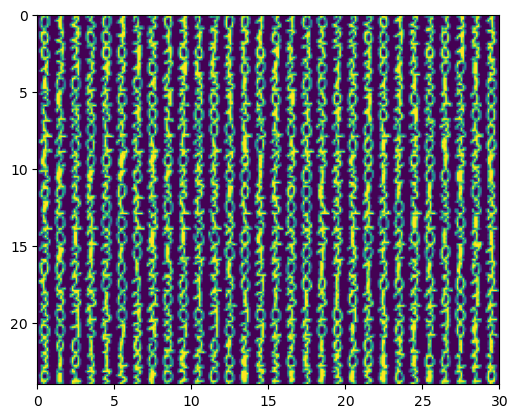

In [31]:
imgrid(x.reshape((-1,8,8)))

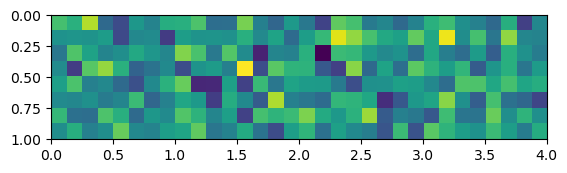

In [32]:
# create a RBM for 8*8 images
Mv = 8*8
Mh = 4
rb = RBM([Mv, Mh], winit=0.1)
imgrid(rb.W.T.reshape((-1,8,8)))

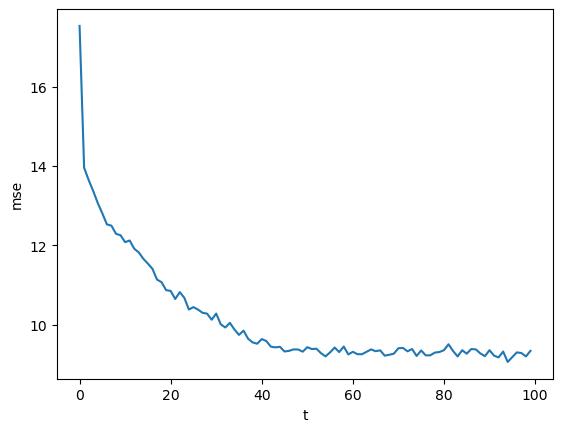

In [33]:
N = 500   # training set size
mse = rb.train(x[:N], K=1, alpha=0.01, T=100)
plt.plot(mse)
plt.xlabel("t"); plt.ylabel("mse");

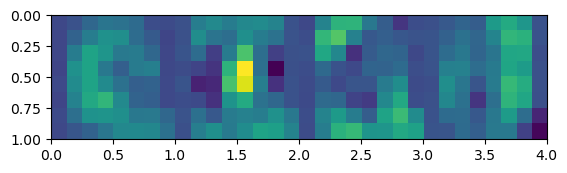

In [34]:
# Learned weights
imgrid(rb.W.T.reshape((-1,8,8)))

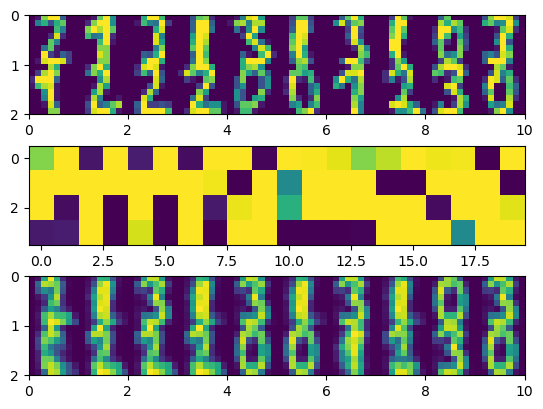

In [35]:
# Test by new data
M = 20
v = x[N:N+M]
plt.subplot(3,1,1)
imgrid(v.reshape((-1,8,8)))
plt.subplot(3,1,2)
h = rb.phv(v)
plt.imshow(h.T)
plt.subplot(3,1,3)
vr = rb.pvh(h.T)  # reconstructed
imgrid(vr.reshape((-1,8,8)));

## 7.5 Variational Autoencoders (VAE)

The objective of learning in a generative model is to minimize the discrepancy between the observed data distribution $p(\x)$ and the generated data distribution

$$
    \int_\z p_{\theta}(\x|\z) p(\z) d\z
$$
while assuming a simple low-dimensional prior distribution $p(\z)$ of the latent varible, such as independent Gaussians.

A standard way to do this is to maximize the log likelihood for data $(\x_1,...,\x_N)$:

$$
    \sum_{n=1}^N\log p_{\theta}(\x_n) = \sum_n\log\int_\z p_\theta(\x_n|\z) p(\z) d\z 
$$

A problem with this approach is that computing $p_{\theta}(x)$ is often intractable: it is hard to compute the integration over all possible ranges of $\z$ with a high dimension.

In the *autoencoder* framework, we consider two networks:

* The *encoder* network that maps the data $\x$ to the latent variable $\z$:

$$
    q_\phi(\z|\x)
$$

* The *decoder* network to regenerate the data $\x$ from the latent variable $\z$:

$$
    p_\theta(\x|\z).
$$

/var/folders/dd/3kwwsm055d1cc1w134st1f580000gn/T/ipykernel_74841/345111544.py:7: DeprecationWarning: `row_stack` alias is deprecated. Use `np.vstack` directly.
  y = np.row_stack((np.tile(Y[l],M[l+1]), np.repeat(Y[l+1],M[l])))


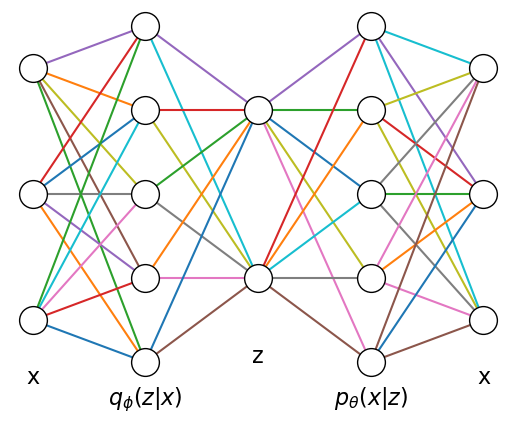

In [36]:
draw_net([3,5,2,5,3], ["x",r"$q_\phi(z|x)$","z",r"$p_\theta(x|z)$","x"]);

The goal of learning of autoencoder is to reduce the reconstruction error, or to maximize the likelihood of regenerated data

$$
    \sum_{n=1}^N\log p_\theta(\x_n) = 
    \sum_{n=1}^N\log\int_\z p_\theta(\x_n|\z) q_\phi(\z|\x_n) d\z 
$$
while keeping the data-constrained latent variable distribution $q_\phi(\z|\x_n)$ close to a desired prior distribution $p(\z)$, such as normal gaussian.

This can be achieved by maximizing the *expected variational lower bound (ELBO):

$$
    \mathcal{L} := 
    \sum_{n=1}^N\log\int_\z p_\theta(\x_n|\z) q_\phi(\z|\x_n) d\z
    - \mbox{KL}[q_\phi(\z|\x_n) || p(\z)]
$$

### Reparametrization trick

For optimizing the parameters $\phi$ and $\theta$ during training the generative model, we want to apply the gradient descent algorithm. We consider a model consisting of two neural networks; one encoder and one decoder network. Since our latent representation $z$ is a stochastic variable, it is mathematically not possible to backpropagate the error through the stochastic network nodes. Therefore, we need to apply a "reparametrization trick" (Kingma and Welling 2014). 

Instead of encoding the stochastic variable z, it will generate its' mean and standard deviation plus adding some Gaussian noise (see Figure 4). In that case, $\mu$ and $\sigma$ are deterministic, so that we can use backpropagation to update our network parameters during training. 



/var/folders/dd/3kwwsm055d1cc1w134st1f580000gn/T/ipykernel_74841/345111544.py:7: DeprecationWarning: `row_stack` alias is deprecated. Use `np.vstack` directly.
  y = np.row_stack((np.tile(Y[l],M[l+1]), np.repeat(Y[l+1],M[l])))


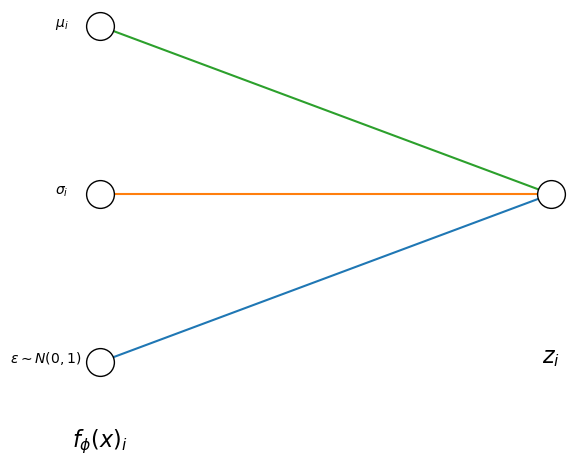

In [37]:
draw_net([3,1], [r"$f_\phi(x)_i$",r"$z_i$"])
plt.text(-0.1, 0.75, r"$\mu_i$")
plt.text(-0.1, 0.5, r"$\sigma_i$")
plt.text(-0.2, 0.25, r"$\epsilon\sim N(0,1)$");

## 7.6 Deep learning tools and pre-trained weights

An important factor in today's boom in deep learning is the availability of open-source software tools that are optimized for general-purpose graphics processing units (GPUs). *Tensorflow* and *Pytorch* are examples of most popular tools today.

In addition, some of the network weights that were trained by large data sets and achieved high performance in competitions are publicly available. Training of deep neural networks require heavy computing, but running a deep neural network for classification or prediction is much less demanding.
By downloading such pre-trained weights, anybody can reproduce state-of-the-art performance in deep neural networks. You can further customize or improve the model by adding your own higher layers on top of those pre-trained networks.

## 7.7 Visual cortex and covolutional networks

### Simple and complex receptive fields
Soon after the discovery of orientation selective tuning of cat visual cortex neurons, Hubel & Wiesel further found that there are neurons that show *complex* receptive fields. Those neurons respond to presentation of bars in particular orientations in different positions in their large receptive fields. 

They suggested a networks architecutre that simple cells sum together inputs from on- or off-center cells in the thalamus, while complex cells sum together inputs from simple cells with similar orientation selectivity.
> <div>
> <img src="https://ars.els-cdn.com/content/image/1-s2.0-S0896627301004974-gr1_lrg.jpg" width=500"/>
> </div>
>
>  Simple and complex receptive fields proposed by Hubel and Wiesel (adopted from a review by Callaway 2001).


This is a historic movie showing how they identified such receptive fields.

In [38]:
from IPython.display import IFrame
IFrame(src="https://www.youtube.com/embed/jw6nBWo21Zk?si=3eZ_xChU_MZwDu8R", width="560", height="315" )

### Neocognitron

Inspired by the simple and complex receptive fields found by Hubel & Wiesel, Fukushima proposed a pattern classification neural network model called *Cognitron* and then its extended version *Neocognitron* (Fukushima 1980).

> ![Fukushima80](https://media.springernature.com/full/springer-static/image/chp%3A10.1007%2F978-3-642-30574-0_44/MediaObjects/978-3-642-30574-0_44_Fig2_HTML.jpg?as=webp)
> 
> The architecture of Neocognitron (Fukushima 1980, 2014)

### Analyzing neural coding by trained deep networks

Inspired by the success of deep neural networks in visual object recognition, Yamins and colleagues explored how such trained deep neural networks can be used to characterize the response properties of higher visual cortex neurons, which are not easy to express by mathematical formulas.

They first trained a deep neural network to perform visual object recognition task and then used the responses of the higher layers of the deep neural network to predict the activity of visual cortex neurons when the same stimulus was presented. 

They found that the response propereties of the highest visual cortical area, inferior temporal (IT) cortex, was well predicted using the activities of the highest layer of the trained deep network, while those in the middle level of the visual cortex, area V4, were better predicted by the responses of the intermediate layers of the deep network (Yamins et al. 2014, 2016)

<img src="https://www.pnas.org/cms/10.1073/pnas.1403112111/asset/7a11a5c7-9ea1-44fc-8e46-b050d1abda83/assets/graphic/pnas.1403112111fig02.jpeg" width="500px">
Figure 7.3: Prediction of visual cortical neural activities by trained deep neural networks (Yamins et al. 2014).

## Backpropagation in the Brain?

Given the success of backpropagation, people considered whether multi-layer learning like backpropagation can be realized in the brain. It is not biologically possible for the error in the higher layer to be be propagated through the synapses and axons to the lower layer. There are top-down synaptic connections in the cortical circuits, but a chellenge is how they can be kept to be the transpose of bottom-up connections, know as the *weight trasport* problem.

There are a number of proposals about how backpropagation-like learning can be possible in the realistic cortical circuits, such as Millidge et al. (2022) and Max et al. (2024).

## References

* Bishop CM (2006) Pattern Recognition and Machine Learning. Springer. 
https://www.microsoft.com/en-us/research/people/cmbishop/prml-book/
    * Chapter 5: Neural networks
* Goodfellow I, Bengio Y, Courville A (2016) Deep Learning. MIT Press. (http://www.deeplearningbook.org)
    * 3.13 Information Theory
    * 19.4 Variational Inference and Learning
    * Chapter 20 Deep Generative Models
        
### Backpropagation
* Rumelhart DE, Hinton GE, Williams RJ (1986). Learning Representations by Back-Propagating Errors. Nature, 323, 533-536. https://doi.org/10.1038/323533a0

### Boltzmann machines
* Ackley DH, Hinton GE, Sejnowski TJ (2010). A Learning Algorithm for Boltzmann Machines*. Cogn Sci, 9, 147-169. https://doi.org/10.1207/s15516709cog0901_7
* Salakhutdinov R, Hinton G (2012) An efficient learning procedure for deep Boltzmann machines. Neural Computation 24:1967-2006. https://doi.org/10.1162/NECO_a_00311

### Variational autoencoders
* Kingma DP, Welling M (2014). Auto-encoding variational Bayes. International Conference on Learning Representations (ICLR). https://doi.org/10.48550/arXiv.1312.6114  
* Doersch, C. (2016). Tutorial on variational autoencoders. arXiv:1606.05908. https://doi.org/10.48550/arXiv.1606.05908  

### Visual cortex and convolutional neural networks
* Hubel DH, Wiesel TN (1962). Receptive fields, binocular interaction and functional architecture in the cat's visual cortex. Journal of Physiology, 160, 106-154. https://doi.org/10.1113/jphysiol.1962.sp006837
* Callaway EM (2001). Neural mechanisms for the generation of visual complex cells. Neuron, 32, 378-80. https://doi.org/10.1016/s0896-6273(01)00497-4
* Fukushima K (1980). Neocognitron: a self organizing neural network model for a mechanism of pattern recognition unaffected by shift in position. Biol Cybern, 36, 193-202. https://doi.org/10.1007/BF00344251
* Fukushima K (2014). Modeling Vision with the Neocognitron. Kasabov N, Springer Handbook of Bio-Neuroinformatics, Springer Berlin Heidelberg, 765-782. https://doi.org/10.1007/978-3-642-30574-0_44
* Yamins DL, Hong H, Cadieu CF, Solomon EA, Seibert D, DiCarlo JJ (2014). Performance-optimized hierarchical models predict neural responses in higher visual cortex. Proceedings of the National Academy of Sciences USA, 111, 8619-24. https://doi.org/10.1073/pnas.1403112111
* Horikawa T, Kamitani Y (2017). Generic decoding of seen and imagined objects using hierarchical visual features. Nature Communications, 8. https://doi.org/10.1038/ncomms15037

### Backpropagation in the brain?

* Millidge B, Tschantz A, Buckley CL (2022). Predictive coding approximates backprop along arbitrary computation graphs. Neural Comput, 34, 1329-1368. https://doi.org/10.1162/neco_a_01497
* Max K, Kriener L, Pineda García G, Nowotny T, Jaras I, Senn W, Petrovici MA (2024). Learning efficient backprojections across cortical hierarchies in real time. Nature Machine Intelligence, 6, 619-630. https://doi.org/10.1038/s42256-024-00845-3
